<p> Universidade do Estado do Rio de Janeiro </p>
<p> Instituto Politécnico </p>
<p> Trabalho de Modelos Lineares </p>

### **Trabalho 1**
**Grupo:**

Alunos:
- Gustavo Dias de Oliveira
- Jéssica de Souza Diniz
- Letícia Bussinger das Neves
- Pedro Longue Correa
- Thiago Bastos da Silva

**Questão 1:**  Considerando o conjunto dados, responda as questões abaixo considerando o modelo simples e o
modelo de regressão linear simples:

Abaixo, iremos apresentar os dados que serão utilizados. Estes se referem ao preço diário de venda do café em doláres (USD). A base de dados conta com a data, os valores de abertura, de fechamento, o mais alto e o mais baixo do dia, além do volume vendido. Neste caso, iremos considerar o valor mais alto do dia para responder as questões do trabalho, tendo então, uma relação entre o valor do café e volume que foi vendido no dia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

df = pd.read_csv('coffee.csv', sep=",")

x = np.array(df['High'])
y = np.array(df['Volume'])

pd.DataFrame(df,columns=['High','Volume'])

,High,Volume
0,124.00,6640
1,120.50,5492
2,121.00,6165
3,121.40,5094
4,117.75,6855
...,...,...
5741,240.55,1
5742,241.75,14
5743,240.75,12
5744,238.55,6


#### a) Faça o gráfico das distribuições de cada uma das duas variáveis (Y e X). (Dois gráficos separados)

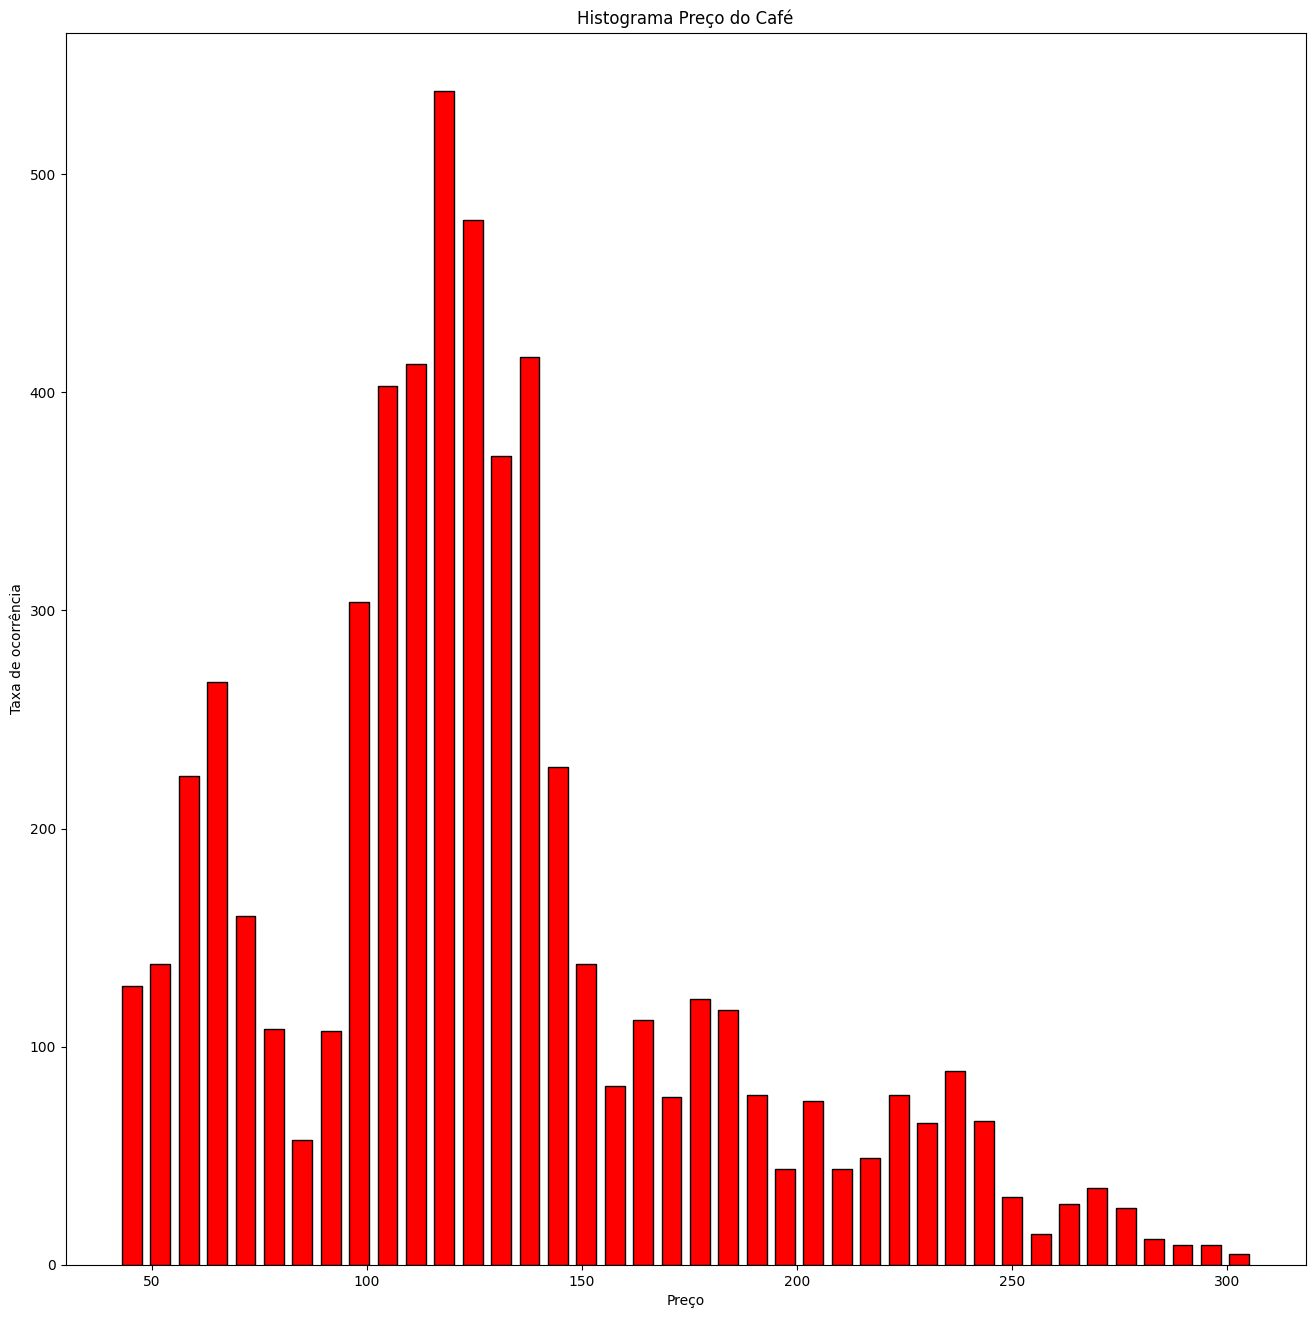

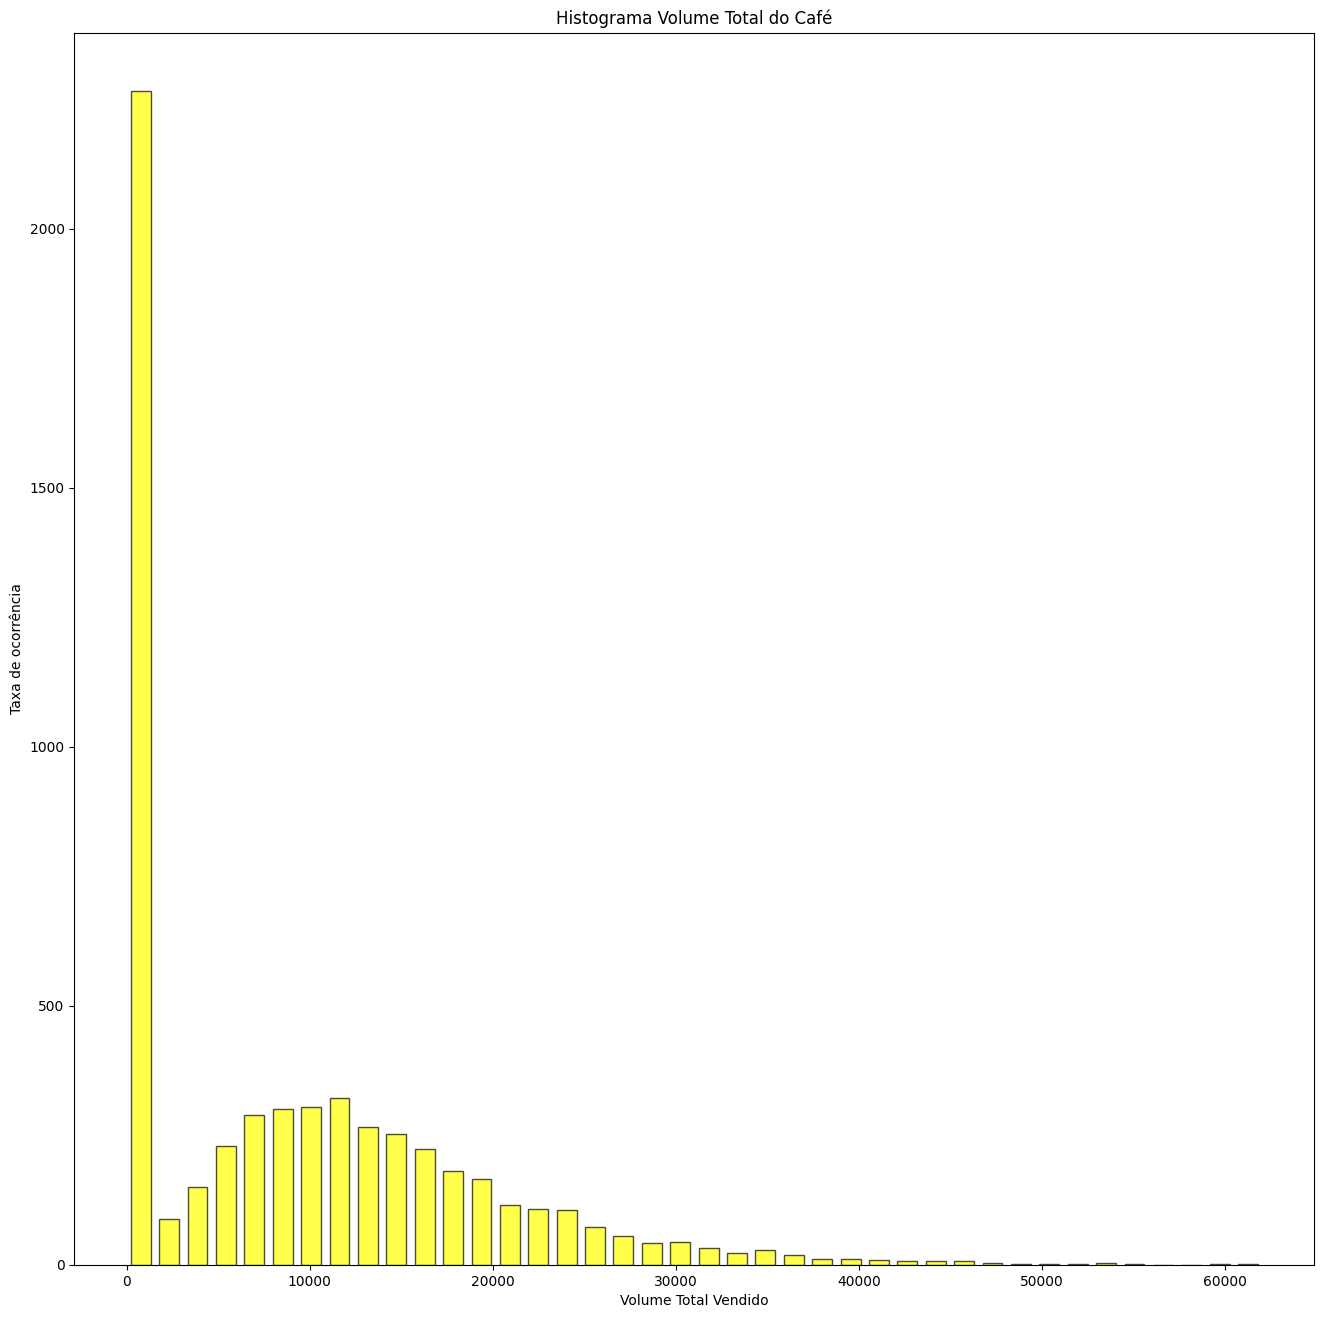

In [2]:
plot.figure(figsize=(16,16))
plot.title("Histograma Preço do Café")
plot.xlabel("Preço")
plot.ylabel("Taxa de ocorrência")
plot.hist(x,bins = 40, ec = "k",rwidth=0.7,color = "red")
plot.show()

plot.figure(figsize=(16,16))
plot.title("Histograma Volume Total do Café")
plot.xlabel("Volume Total Vendido")
plot.ylabel("Taxa de ocorrência")
plot.hist(y,bins = 40, ec = "k",rwidth=0.7,color='yellow', alpha=0.7)
plot.show()

#### b) Através das distribuições é possível identificar pontos influentes em alguma das variáveis? Comente.

A partir dos estudos, é sabido que em uma determinada amostra de dados, os chamados pontos influentes são pontos que possuem uma recorrência de frequência menor do que a própria base de dados. Logo, a partir da observação das taxas de ocorrência das duas variáveis utilizadas (Preço e Volume Total Vendido), podemos analisar que, para a variável Preço, as menores taxas se encontram acima de $275$, já para a variável Volume Total Vendido, as menores taxas se apresentam a partir de $48.000$. Portanto, para todos os valores compreendidos dentro dessas condições, são considerados pontos influentes.

#### c) Faça o gráfico xy do conjunto de dados. Visualmente, é possível identificar alguma correlação entre as variáveis?

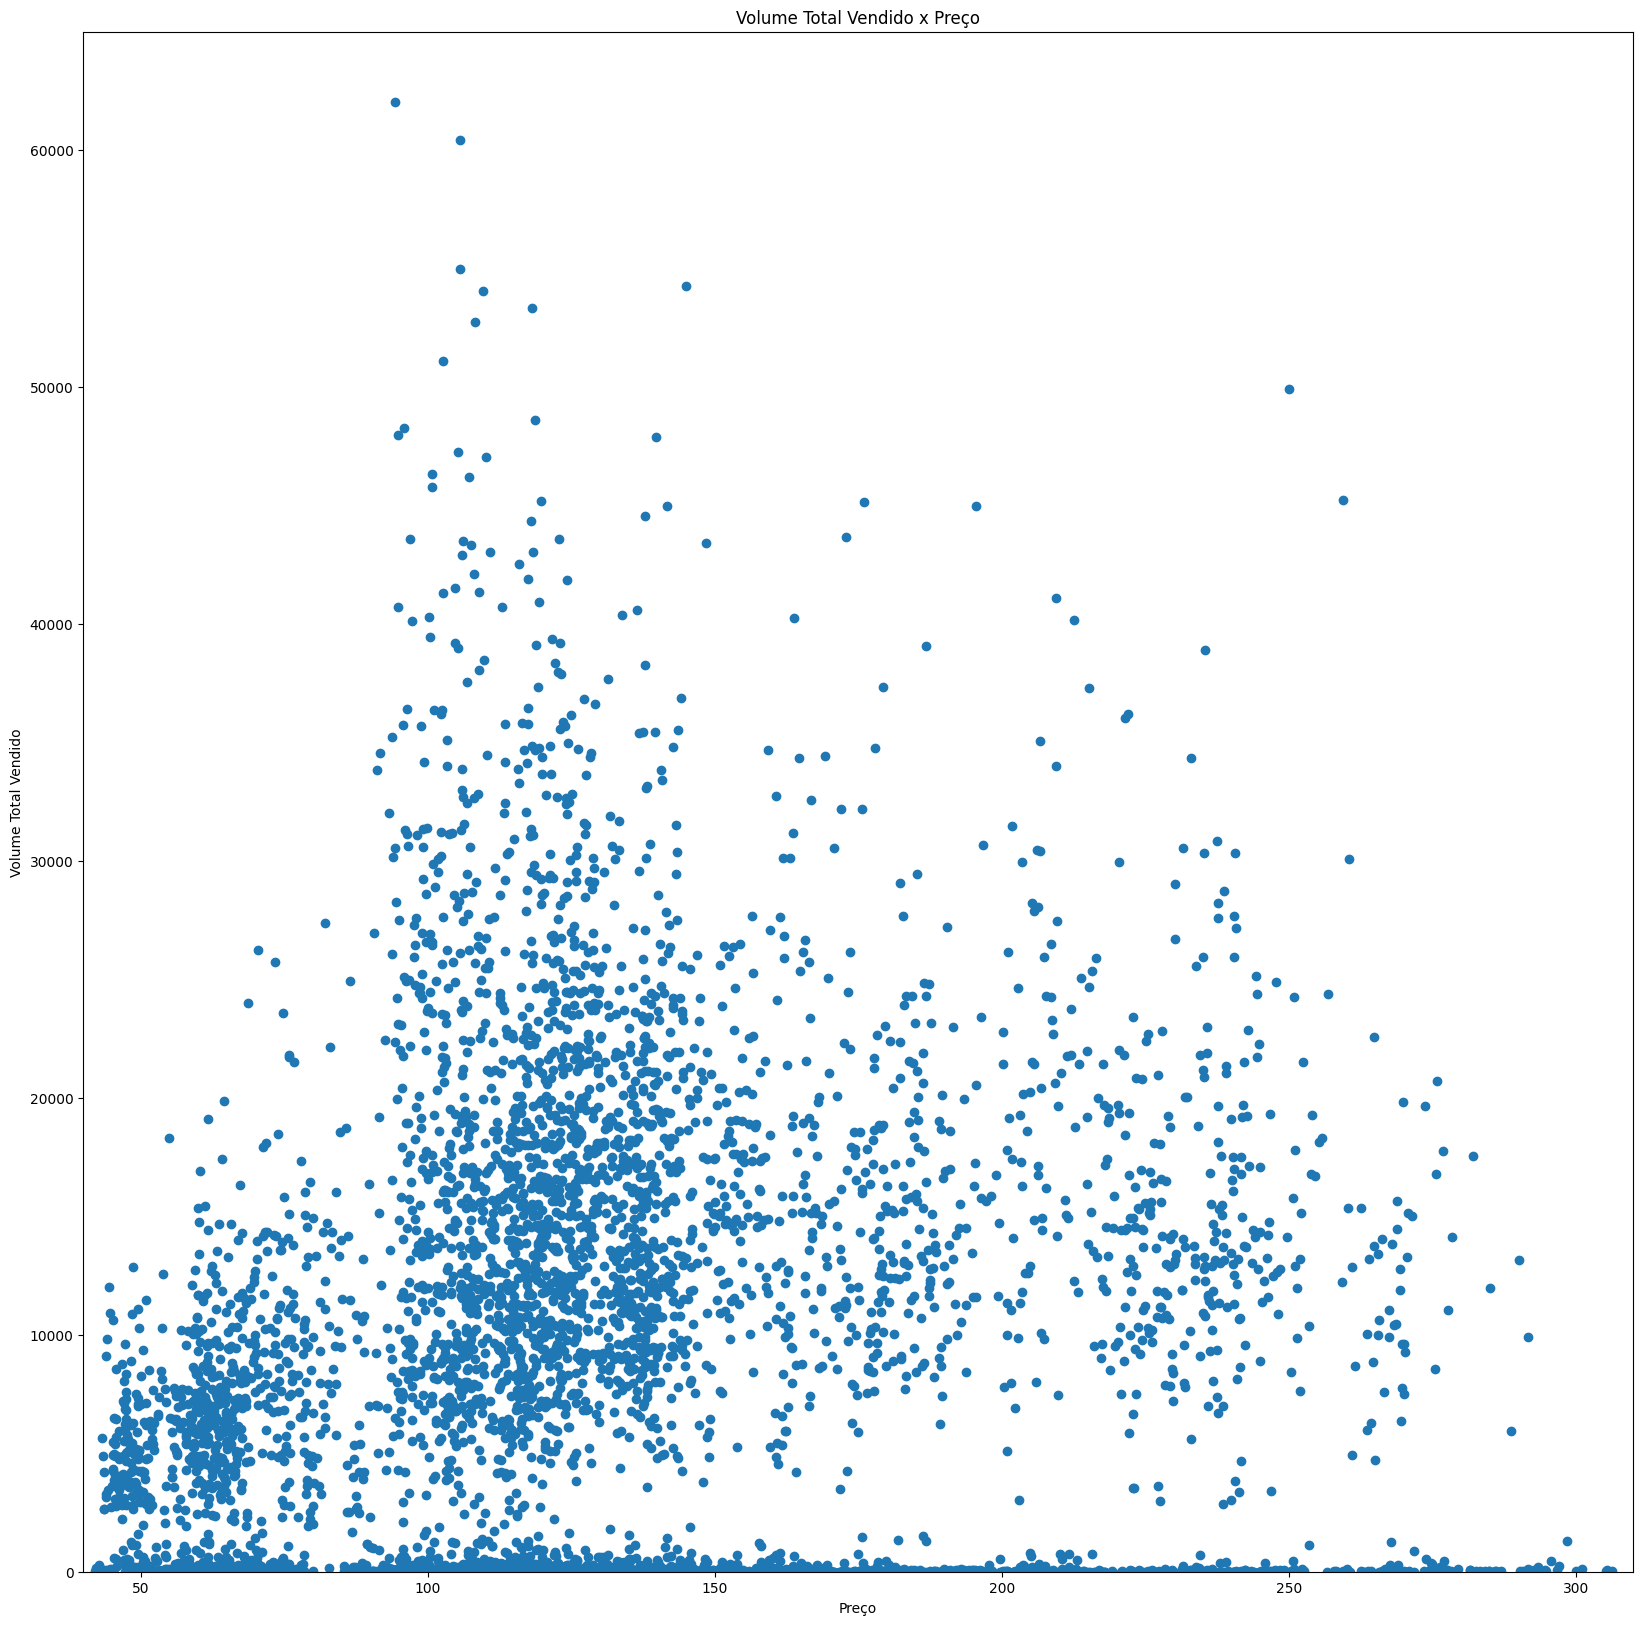

<Figure size 3200x1200 with 0 Axes>

In [3]:
plot.figure(figsize=(20,20))
plot.title("Volume Total Vendido x Preço")
plot.xlim(40,310)
plot.ylim(0,65000)
plot.xlabel("Preço")
plot.ylabel("Volume Total Vendido")
plot.plot(x,y,"o")
plot.figure(figsize = (32, 12))
plot.show()

Observa-se pelo gráfico volume vendido x preço mais alto, conclui-se que o volume total aumenta com os menores preços e o volume total diminui com os maiores preços

#### d) Calcule o coeficiente de correlação e comente o resultado.

In [4]:
N = len(x)
print("Número de pontos:", N, "\n")
sumY = 0.0 
sumX = 0.0 
sumXm2 = 0.0 
sumYm2 = 0.0 
sumXmYm = 0.0

for i in range(N):
    sumX += x[i]
    sumY += y[i]
    
x_medio = sumX/N 
y_medio = sumY/N 
    
for i in range(N):
    sumXmYm += (x[i]-x_medio)*(y[i]-y_medio)
    sumXm2 += (x[i]-x_medio)**2
    sumYm2 += (y[i]-y_medio)**2
    
correlacao = (sumXmYm)/np.sqrt(sumXm2*sumYm2)

print("coeficiente de Correlacao:", correlacao)

Número de pontos: 5746 

coeficiente de Correlacao: 0.12076815384626614


Analisando os dados para o coeficiente de correlação, percebe-se, que entre as variáveis aleatórias estudadas, teremos uma possível relação linear. A relação  linear indica se estão fortemente relacionados (quando perto de -1 e 1) , fracamente relacionados (quando mais próximo de 0) e sem relação quando igual a zero. Portanto, podemos concluir que o coeficiente de correlação das variáveis do experimento está mais próximo de 0 do que de 1, o que determina um grau fraco de correlação entre as mesmas, uma vez que pode ser determinada como uma correlação linear negativa por ter o sinal negativo.

#### e) Encontre a reta de quadrados mínimos (estime $β_0$, $β_1$ e ${σ}^{2}$ ).

In [5]:
sumX = 0.0
sumXX=0.0
sumY = 0.0
sumXY= 0.0
sumResiduos= 0.0
sumYChapeu= 0.0


for i in range(N):
    sumX += x[i]
    sumXX += x[i]**2
    sumY += y[i]
    sumXY += x[i] * y[i]


b_chapeu = (sumXY -  sumY*sumX/N)/(sumXX - (sumX)**2/N)
a_chapeu = ((sumY/N) ) - (b_chapeu/N) * sumX
var = (1/N)*sumYm2

print("β_0:", a_chapeu)
print("β_1:", b_chapeu)
print("σ^2:", var)
print("A reta que melhor se ajusta aos dados é y: ", a_chapeu, "+" , b_chapeu,"*x")

#calculando os residuos
for i in range(N):
    y_chapeu = (a_chapeu + b_chapeu*x[i]) 
    e = y[i] - y_chapeu
    sumResiduos += e
    sumYChapeu += y_chapeu

X = np.arange(0,1000,0.1)
Y = []

for i in range(len(X)):
    Y.append(a_chapeu + b_chapeu*X[i]) 

β_0: 5883.674641012798
β_1: 22.689728780594066
σ^2: 92389631.27394484
A reta que melhor se ajusta aos dados é y:  5883.674641012798 + 22.689728780594066 *x


#### f) Faça o gráfico dos dados no plano xy incluindo a reta de quadrados mínimos encontrada no item anterior.

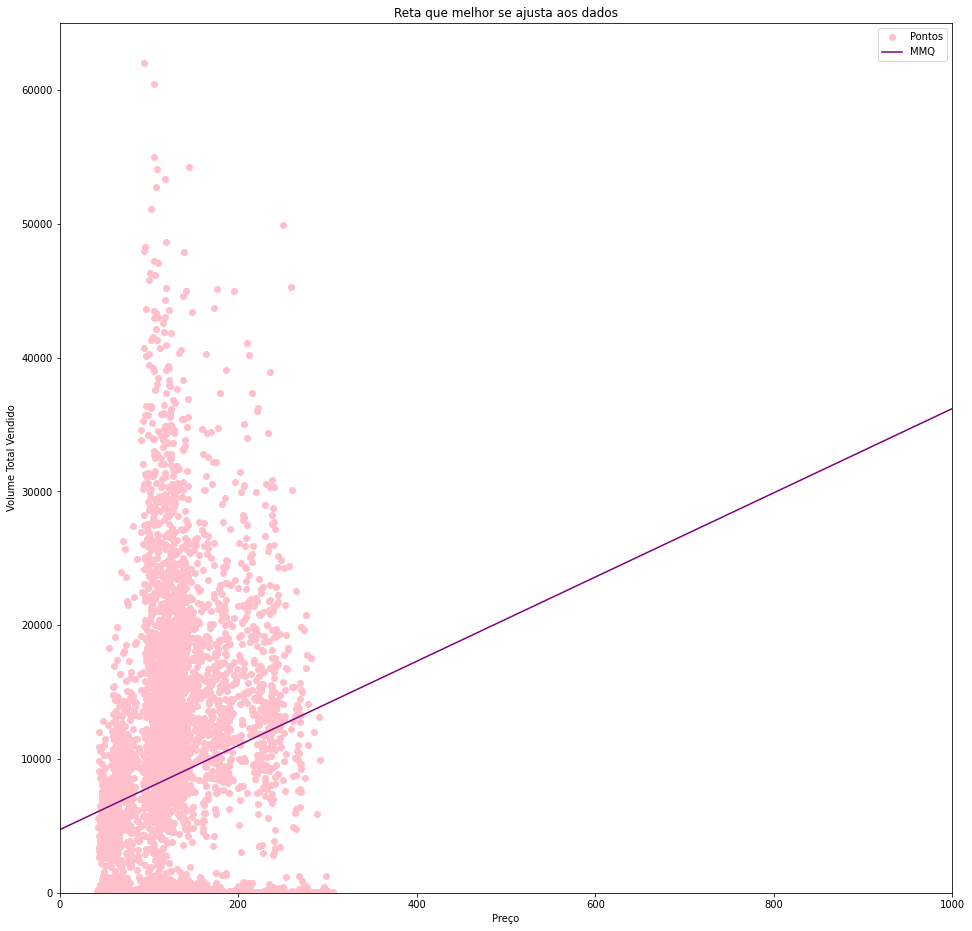

In [63]:
plot.figure(figsize=(16,16))
plot.plot(x,y,"o",label='Pontos', color='pink')
plot.plot(X,Y,label='MMQ', color='purple')
plot.legend(['Pontos','MMQ'], loc=0)

plot.ylim(0,65000)
plot.xlim(0,1000)
plot.title("Reta que melhor se ajusta aos dados")
plot.xlabel("Preço")
plot.ylabel("Volume Total Vendido")

plot.show()

#### g) Calcule os resíduos.

In [32]:
#Residuos
sumResiduos=0.0
sumYChapeu=0.0
e = []
y_chapeu = []
for i in range(N):
    y_chapeu.append(a_chapeu + b_chapeu*x[i]) 
    e.append(y[i] - y_chapeu[i])
    sumResiduos += e[i]
    sumYChapeu += y_chapeu[i]
    
       
pd.DataFrame({'y^': y_chapeu,'e': e})

,y^,e
0,8697.201010,-2057.201010
1,8617.786959,-3125.786959
2,8629.131823,-2464.131823
3,8638.207715,-3544.207715
4,8555.390205,-1700.390205
...,...,...
5741,11341.688899,-11340.688899
5742,11368.916574,-11354.916574
5743,11346.226845,-11334.226845
5744,11296.309442,-11290.309442


[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y')]

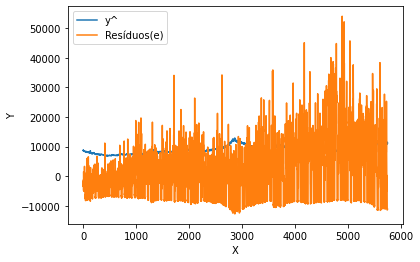

In [13]:
pd.DataFrame({'y^': y_chapeu,'Resíduos(e)': e}).plot().set(xlabel='X', ylabel='Y')

In [33]:
print("Somatorio dos Residuos:", sumResiduos)

Somatorio dos Residuos: 9.798895916901529e-09


#### h) Comente sobre os valores dos resíduos e os pontos influentes visualmente detectados no item b).

Verificando nos pontos influentes é possível observar que os resíduos são os mais altos, o que pode ser comprovado retirando os pontos e fazendo novamente os cálculos.
De acordo com a teoria a soma dos resíduos deve ser 0 ou muito próxima de 0, e somando os resíduos obtidos conseguimos observar que o nosso resultado se aproxima muito de 0, sendo assim, os cálculos realizados foram eficazes.

#### i) Monte a tabela ANOVA e, para o intervalo de confiança de 95%, verifique se a hipótese nula (modelo simples) é rejeitada (utilize a tabela da distribuição F do livro).

In [40]:
sumYYChapeu = 0.0 
sumXX2= 0.0
sumYY2 = 0.0 
SQReg= 0.0 
SQT  = 0.0

beta_0 = a_chapeu
beta_1 = b_chapeu

for i in range(N):
    y_chapeu = (beta_0 + beta_1*x[i]) 
    sumYYChapeu += (y[i]-y_chapeu)**2
    sumXX2 += (x[i]-x_medio)**2
    sumYY2 += (y[i]- y_medio)**2  
 
varMSMRLS = (sumYYChapeu)/(N-2)    
SQReg = (beta_1**2)*sumXX2
SQT = sumYY2
SQE = SQT - SQReg
F_0 = SQReg/(SQE/(N-2))

print("Variancia MSxMRLS: ", varMSMRLS)
print("SQReg: ", SQReg)
print("SQT: ", SQT)
print("SQE: ", SQE)
print("F_0: ", F_0)

if(F_0> 3.84): 
    print("Pode-se rejeitar a Hipótese H0:β_1=0")
else:
    print("Não se pode rejeitar a Hipótese H0:β_1=0")

Variancia MSxMRLS:  91073833.30716749
SQReg:  7742722783.713837
SQT:  530870821300.087
SQE:  523128098516.37317
F_0:  85.01588768751694
Pode-se rejeitar a Hipótese H0:β_1=0


In [41]:
import csv
with open('./tabelaANOVA.csv', 'w',newline='') as csvfile:

    writer = csv.DictWriter(csvfile, delimiter=';', fieldnames=['Fonte de Variação(FV)','Graus de Liberdade(GL)','Soma de Quadrados(SQ)','Quadrados Médios(QM)','Estatística do Teste(F0)','Valor intervalo de confiança 95%'])

    writer.writeheader()
    csv.writer(csvfile, delimiter=';').writerow(['Regressão', 1,SQReg,SQReg, SQReg/(SQE/(N-2)), "3.84"])
    csv.writer(csvfile, delimiter=';').writerow(["Erro", N-2, SQE, SQE/(N-2)])
    csv.writer(csvfile, delimiter=';').writerow(["Total", N-1, SQT])

#### j) Retire os pontos classificados como influentes e repita os passos e) e f). Comente sobre os resultados.

In [42]:
filt = df[df['Volume'] < 48000]
x_filter1=np.array(filt['High'])
y_filter1 = np.array(filt['Volume'])
df_novo = pd.DataFrame(filt,columns=['High','Volume'])

filt1 = df_novo[df_novo['High'] < 275]
df_novo1 = pd.DataFrame(filt1,columns=['High','Volume'])
pd.DataFrame(df_novo1,columns=['High','Volume'])

filt2 = df_novo1[df_novo1['High'] > 30]
df_novo2 = pd.DataFrame(filt2,columns=['High','Volume'])
x_filter=np.array(filt2['High'])
y_filter = np.array(filt2['Volume'])
pd.DataFrame(df_novo2,columns=['High','Volume'])

,High,Volume
0,124.00,6640
1,120.50,5492
2,121.00,6165
3,121.40,5094
4,117.75,6855
...,...,...
5741,240.55,1
5742,241.75,14
5743,240.75,12
5744,238.55,6


#### Reta de quadrados mínimos (estime $β_0$, $β_1$ e ${σ}^{2}$ ).

In [44]:
N_filter = len(x_filter)
sumX = 0.0
sumXX=0.0
sumY = 0.0
sumXY= 0.0
sumResiduos= 0.0
sumYChapeu= 0.0


for i in range(N_filter):
    sumX += x_filter[i]
    sumXX += x_filter[i]**2
    sumY += y_filter[i]
    sumXY += x_filter[i] * y_filter[i]


b_chapeu = (sumXY -  sumY*sumX/N)/(sumXX - (sumX)**2/N)
a_chapeu = ((sumY/N) ) - (b_chapeu/N) * sumX
var = (1/N)*sumYY2

print("β_0:", a_chapeu)
print("β_1:", b_chapeu)
print("σ^2:", var)
print("A reta do mmq que melhor se ajusta aos dados e y=", a_chapeu, "+" , b_chapeu,"*x")

# Calculo de Residuos
for i in range(N_filter):
    y_chapeu = (a_chapeu + b_chapeu*x_filter[i]) 
    e = y_filter[i] - y_chapeu
    sumResiduos += e
    sumYChapeu += y_chapeu

X = np.arange(0,1000,0.1)
Y = []

for i in range(len(X)):
    Y.append(a_chapeu + b_chapeu*X[i]) 


β_0: 4711.388024938025
β_1: 31.477825881033006
σ^2: 92389631.27394484
A reta do mmq que melhor se ajusta aos dados e y= 4711.388024938025 + 31.477825881033006 *x


#### Faça o gráfico dos dados no plano xy incluindo a reta de quadrados mínimos encontrada.

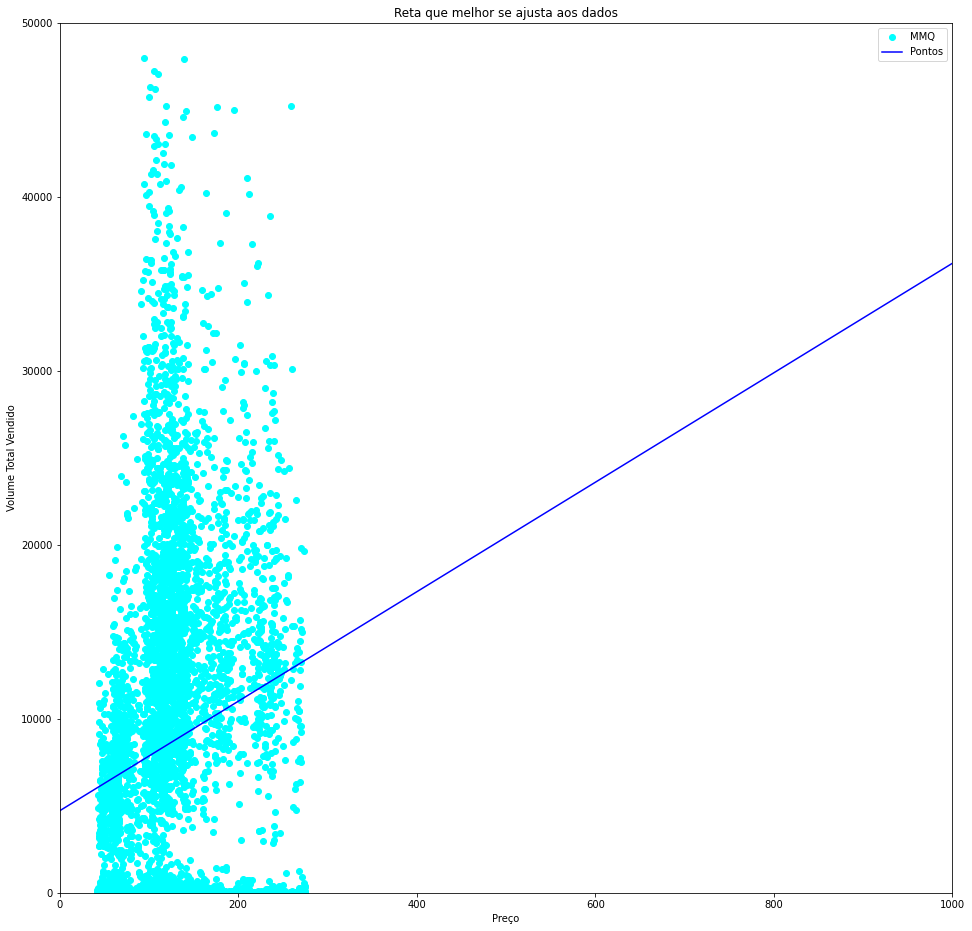

In [59]:
plot.figure(figsize=(16,16))
plot.plot(x_filter,y_filter,"o",label='Pontos',  color='cyan')
plot.plot(X,Y,label='MMQ', color='blue')
plot.legend(['MMQ','Pontos'], loc=0)

plot.ylim(0,50000)
plot.xlim(0,1000)
plot.title("Reta que melhor se ajusta aos dados")
plot.xlabel("Preço")
plot.ylabel("Volume Total Vendido")

plot.show()

#### Resíduos tirando os pontos influentes.

In [49]:
sumYChapeu=0.0
sumResiduos=0.0
y_chapeu = []
e = []

for i in range(N_filter):
    y_chapeu.append(a_chapeu + b_chapeu*x_filter[i])
    e.append(y_filter[i] - y_chapeu[i])
    sumResiduos += e[i]
    sumYChapeu += y_chapeu[i]
pd.DataFrame({'y^': y_chapeu,'e': e})

,y^,e
0,8614.638434,-1974.638434
1,8504.466044,-3012.466044
2,8520.204957,-2355.204957
3,8532.796087,-3438.796087
4,8417.902022,-1562.902022
...,...,...
5678,12283.379041,-12282.379041
5679,12321.152432,-12307.152432
5680,12289.674606,-12277.674606
5681,12220.423389,-12214.423389


(0.0, 5710.0)

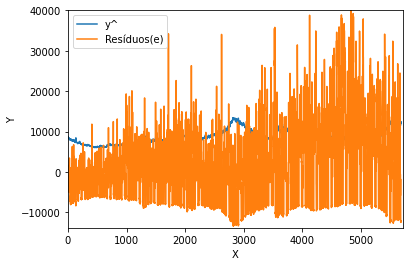

In [94]:
pd.DataFrame({'y^': y_chapeu,'Resíduos(e)': e}).plot().set(xlabel='X', ylabel='Y')
plot.ylim(-13800,40000)
plot.xlim(0,5710)

Pelo novo gráfico, após a remoção dos pontos influentes houve uma diminuição no valor dos residuos.

Logo, infere-se que a presença de pontos influentes geram valores altos nos residuos e como foram retirados no gráfico acima, obtivemos melhores valores.